In [18]:
%matplotlib inline
import numpy as np
import polars as pl
import matplotlib.pyplot as plt


import keras
from tqdm.keras import TqdmCallback


#plt.style.use('seaborn-v0_8-paper')
plt.style.use('tableau-colorblind10')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['lines.linewidth'] = 2


# Color Blind adjusted colors and markers
colormap=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
markers=['o', '*', '.', 'x', '+', 's', 'd', 'h', 'v']
lines=['-', ':', '--', '-.']

In [19]:
x = np.arange(1,31)
y = np.arange(1,31)+np.random.randn(30)

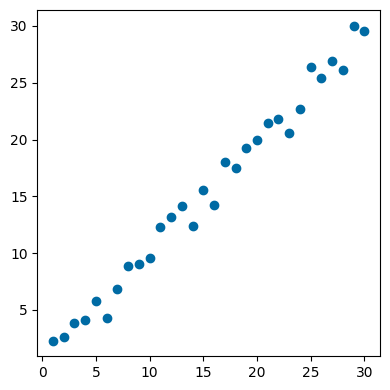

In [20]:
plt.scatter(x, y)

In [ ]:
def autoencoder_model(input_dim=2, latent_dim=1, loss=keras.losses.Huber(delta=0.1), seed=42):
    keras.utils.set_random_seed(seed)

    inputlayer = keras.layers.Input(shape = (input_dim, ))
    latent = keras.layers.Dense(latent_dim, kernel_initializer='glorot_uniform', activation='silu')(inputlayer)
    outputlayer = keras.layers.Dense(input_dim, kernel_initializer='glorot_uniform', activation='linear')(latent)

    autoencoder = keras.Model(inputs = inputlayer, outputs = outputlayer)
    autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=loss, metrics=['r2_score'])

    encoder = keras.Model(inputlayer, latent)

    encoded_input = keras.Input(shape=(latent_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

    return autoencoder, encoder, decoder

In [22]:
autoencoder, encoder, decoder = autoencoder_model()
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
x2 = x[:,np.newaxis]
y2 = y[:,np.newaxis]
X = np.hstack((x2,y2))

In [30]:
EPOCHS = 10000
BATCH_SIZE = 32
history = autoencoder.fit(X, X, epochs=EPOCHS, batch_size=BATCH_SIZE, 
validation_data=(X, X), verbose=0, callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=16, restore_best_weights=True), TqdmCallback(verbose=0)])

0epoch [00:00, ?epoch/s]

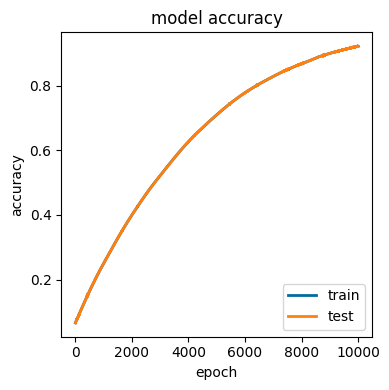

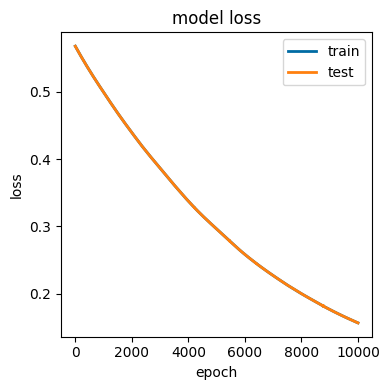

In [31]:
# summarize history for accuracy
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [32]:
y_preds = encoder.predict(X)
print(f'{y_preds}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
[[ 0.9399208 ]
 [ 0.89194655]
 [ 0.8132966 ]
 [ 0.769782  ]
 [ 0.6786108 ]
 [ 0.69659346]
 [ 0.5774354 ]
 [ 0.48193926]
 [ 0.44706723]
 [ 0.40111202]
 [ 0.2947802 ]
 [ 0.2455016 ]
 [ 0.19534536]
 [ 0.21597713]
 [ 0.11616277]
 [ 0.12515154]
 [ 0.02354275]
 [ 0.01524793]
 [-0.03580111]
 [-0.0636436 ]
 [-0.10208815]
 [-0.11976516]
 [-0.11559992]
 [-0.15534121]
 [-0.20398712]
 [-0.20387918]
 [-0.2231075 ]
 [-0.22476593]
 [-0.25359893]
 [-0.2558552 ]]


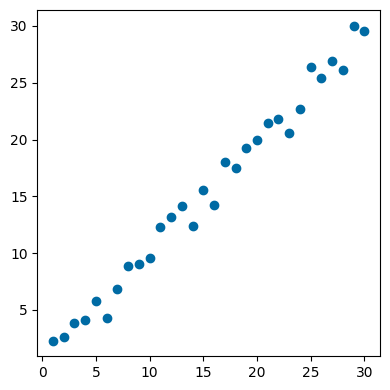

In [33]:
plt.scatter(x, y)

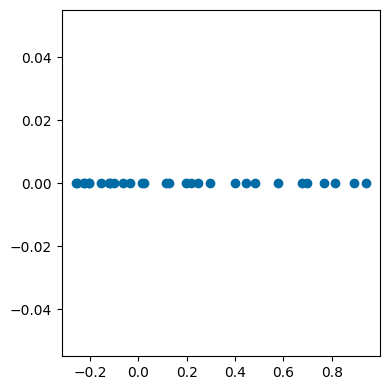

In [34]:
plt.scatter(y_preds, np.full((30, ), 0, dtype=int))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


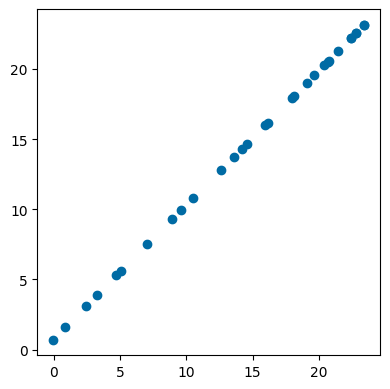

In [35]:
X2 = decoder.predict(y_preds)
x2 = X2[:,0]
y2 = X2[:,1]
plt.scatter(x2, y2)